![image.jpeg](PlayStore.jpeg)

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Data Cleaning and Analysis Activities**

**`Note:` it's better to make a copy from the dataframe and test on it before making any changes in the orignal one**

### 1.Which of the following column(s) has/have null values?

Select the columns that you have identified having null/missing values.

In [89]:
null_counts = df.isnull().sum() #check for null values in all columns
print (null_counts)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


### 2. Clean the Rating Column and Other Columns Containing Null Values

**Steps:**

0. Try plotting a histogram and a boxplot for this column to understand the issue
1. Remove invalid values from the Rating column (set them as NaN).
2. Fill null values in the Rating column using the mean().
3. Clean any other non-numerical columns by dropping the rows containing null values.
4. Perform the modifications "in place", modifying `df`. If you make a mistake, re-load the data.

**Details:**
- Replace all ratings not in the range of 0 to 5 with NaN.
- Drop rows with null values in other columns.

Text(0.5, 1.0, 'Histogram')

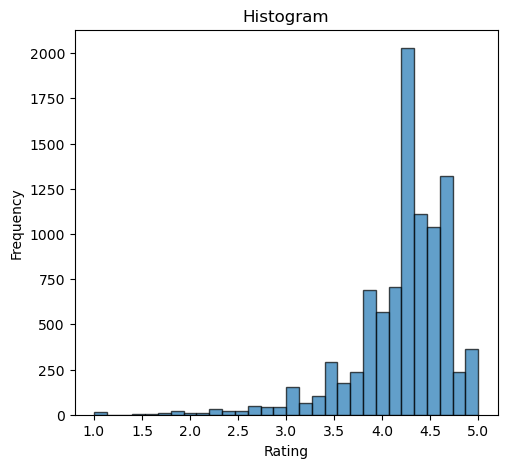

In [91]:
#histogram
valid_data = df["Rating"].dropna() #removing null values from ration column
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data_with_null, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram")


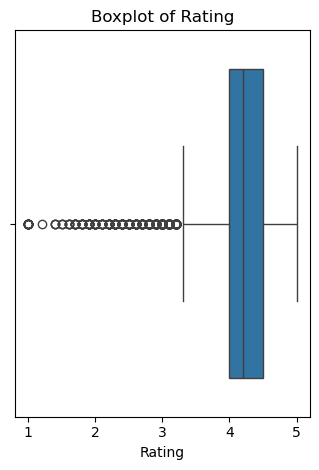

In [178]:
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Rating"].dropna())
plt.title("Boxplot of Rating")

plt.tight_layout()
plt.show()

#Replace invalid ratings (not in 0-5 range) with NaN
df.loc[(df["Rating"] < 0) | (df["Rating"] > 5), "Rating"] = pd.NA

# Step 3: Fill NaN values in the Rating column with the mean
df["Rating"] = df["Rating"].astype(float)  # Ensure it's numeric
df.fillna({"Rating": df["Rating"].mean()}, inplace=True)

# Drop rows with null values in other columns
df.dropna(inplace=True)

### 3. Clean the Reviews Column and Make It Numeric

You'll notice that some columns from this dataframe which should be numeric, were parsed as object (string). That's because sometimes the numbers are expressed with M, or k to indicate Mega or kilo.

Clean the Reviews column by transforming the values to the correct numeric representation. 

For example, 5M should be 5000000.

In [100]:
# Function to convert values
def convert_reviews(value):
    if isinstance(value, str):  # Ensure value is a string before processing
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
    return float(value)  # Convert plain numbers

# Apply transformation
df["Reviews"] = df["Reviews"].apply(convert_reviews).astype(int)  # Convert to integer

# Display cleaned DataFrame
print(df)


                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

         Rating  Reviews   

### 4. Count the Number of Duplicated Apps

Count the number of duplicated rows. That is, if the app Twitter appears 2 times, that counts as 2.

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [104]:
# Count the number of duplicated rows based on the 'App' column
duplicate_count = df[df.duplicated(subset=["App"], keep=False)].shape[0]

# Display the count
print(f"Number of duplicated app entries: {duplicate_count}")


Number of duplicated app entries: 1979


### 5. Drop Duplicated Apps Keeping Only the Ones with the Greatest Number of Reviews

Now that the Reviews column is numeric, we can use it to clean duplicated apps. Drop duplicated apps, keeping just one copy of each, the one with the greatest number of reviews.

Hint: you'll need to sort the dataframe by App and Reviews, and that will change the order of your df.

In [108]:
#first we sort df with reviews descendingly and apps assendingly
df.sort_values(by=["App", "Reviews"], ascending=[True, False], inplace=True)
df.drop_duplicates(subset=["App"], keep="first", inplace=True) #drop second duplicate
df.reset_index(drop=True, inplace=True) #Reset index for a cleaner DataFrame
print(df)

                                                   App       Category  \
0                 "i DT" Fútbol. Todos Somos Técnicos.         SPORTS   
1                        +Download 4 Instagram Twitter         SOCIAL   
2                           - Free Comics - Comic Apps         COMICS   
3                                                   .R          TOOLS   
4                                               /u/app  COMMUNICATION   
...                                                ...            ...   
9643                           뽕티비 - 개인방송, 인터넷방송, BJ방송  VIDEO_PLAYERS   
9644                                        💎 I'm rich      LIFESTYLE   
9645     💘 WhatsLov: Smileys of love, stickers and GIF         SOCIAL   
9646  📏 Smart Ruler ↔️ cm/inch measuring for homework!          TOOLS   
9647  🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  ENTERTAINMENT   

        Rating  Reviews  Size    Installs  Type    Price Content Rating  \
0     4.191757       27  3.6M        500+  Free 

### 6. Format the Category Column

Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.

Example, the category AUTO_AND_VEHICLES should be transformed to: Auto and vehicles. Also, if you find any other wrong value transform it into an Unknown category.

In [112]:
# Function to clean category names
def clean_category(value):
    if isinstance(value, str):  # Ensure it's a string before processing
        formatted_value = value.replace("_", " ").title()  # Convert to title case and replace underscores
        return formatted_value
    return "Unknown category"  # Handle unexpected values

# Apply transformation to the 'Category' column
df["Category"] = df["Category"].apply(clean_category)

# Display the cleaned DataFrame
print(df[["Category"]])  

           Category
0            Sports
1            Social
2            Comics
3             Tools
4     Communication
...             ...
9643  Video Players
9644      Lifestyle
9645         Social
9646          Tools
9647  Entertainment

[9648 rows x 1 columns]


### 7. Clean and Convert the Installs Column to Numeric Type

Clean and transform Installs as a numeric type. Some values in Installs will have a + modifier. Just remove the string and honor the original number (for example +2,500 or 2,500+ should be transformed to the number 2500).

In [116]:
# Function to clean and convert Installs to numeric
def clean_installs(value):
    if isinstance(value, str):  # Ensure the value is a string before processing
        value = value.replace("+", "").replace(",", "")  # Remove "+" and commas
        return int(value)  # Convert to integer
    return value  # If it's already numeric, return as is

# Apply the transformation
df["Installs"] = df["Installs"].apply(clean_installs)

# Display the cleaned DataFrame
print(df[["Installs"]].head()) 


   Installs
0       500
1   1000000
2     10000
3     10000
4     10000


### 8. Clean and Convert the Size Column to Numeric (Representing Bytes)

The Size column is of type object. Some values contain either a M or a k that indicate Kilobytes (1024 bytes) or Megabytes (1024 kb). These values should be transformed to their corresponding value in bytes. For example, 898k will become 919552 (898 * 1024).

Some other values are completely invalid (there's no way to infer the numeric type from them). For these, just replace the value for 0.

Some other rules are related to + modifiers, apply the same rules as the previous task.

In [124]:
# Function to convert values
def convert_Size(value):
    if isinstance(value, str):  # Ensure value is a string before processing
        if 'M' in value:
            return float(value.replace('M', '')) * 1024 * 1024 #convert mega
        elif 'k' in value:
            return float(value.replace('k', '')) * 1024 #convert kilo
        elif value.isnumeric():  # If it's already a number
            return int(value)
    return 0  # If invalid, return 0
# Apply transformation to the 'Size' column
df["Size"] = df["Size"].apply(convert_size)


# Display cleaned DataFrame
print(df)

                                                   App       Category  \
0                 "i DT" Fútbol. Todos Somos Técnicos.         Sports   
1                        +Download 4 Instagram Twitter         Social   
2                           - Free Comics - Comic Apps         Comics   
3                                                   .R          Tools   
4                                               /u/app  Communication   
...                                                ...            ...   
9643                           뽕티비 - 개인방송, 인터넷방송, BJ방송  Video Players   
9644                                        💎 I'm rich      Lifestyle   
9645     💘 WhatsLov: Smileys of love, stickers and GIF         Social   
9646  📏 Smart Ruler ↔️ cm/inch measuring for homework!          Tools   
9647  🔥 Football Wallpapers 4K | Full HD Backgrounds 😍  Entertainment   

        Rating  Reviews        Size  Installs  Type    Price Content Rating  \
0     4.191757       27   3774873.0       50

### 9. Clean and Convert the Price Column to Numeric

Values of the Price column are strings representing price with special symbol '$'.

In [182]:
print(df["Price"].unique())  # See what values exist before cleaning


['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [186]:
# Function to clean and convert Price to numeric
def clean_price(value):
    if pd.isna(value):  # Handle NaN values
        return 0.0
    
    if isinstance(value, str):  # Ensure it's a string before processing
        value = value.replace("$", "").strip()  # Remove $ and extra spaces
        
        if value.lower() in ["free", ""]:  # Handle 'Free' and empty values
            return 0.0
        
        try:
            return float(value)  # Convert to float
        except ValueError:
            return 0.0  # Handle unexpected cases
    
    return 0.0  # Default to 0.0 for any invalid cases

# Convert Price column to string (to avoid issues with mixed types)
df["Price"] = df["Price"].astype(str)

# Apply the function
df["Price"] = df["Price"].apply(clean_price)

# Verify the unique values after cleaning
print(df["Price"].unique())
print(df["Price"].dtype)  # Ensure it's float now

print(df)


[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]
float64
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3            

### 10. Paid or Free?

Now that you have cleaned the Price column, let's create another auxiliary Distribution column.

This column should contain Free/Paid values depending on the app's price.

In [190]:
# Create the Distribution column based on the Price column
df["Distribution"] = df["Price"].apply(lambda x: "Free" if x == 0.0 else "Paid")

# Display 
print(df[["Price", "Distribution"]])


       Price Distribution
0        0.0         Free
1        0.0         Free
2        0.0         Free
3        0.0         Free
4        0.0         Free
...      ...          ...
10836    0.0         Free
10837    0.0         Free
10838    0.0         Free
10839    0.0         Free
10840    0.0         Free

[10841 rows x 2 columns]


## Finally!!! 
- Now all is left is to save the new dataframe we made into a new csv file called `filteredplaystore.csv`

In [192]:
# Save the cleaned dataframe to a CSV file
df.to_csv("filteredplaystore.csv", index=False)

# Verify the file was saved successfully
print("Data saved successfully as 'filteredplaystore.csv'.")


Data saved successfully as 'filteredplaystore.csv'.
